Task-04
Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

About Dataset
Twitter Sentiment Analysis Dataset

Overview
This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [6]:
cols=['ID', 'Topic', 'Sentiment', 'Text']
train=pd.read_csv('D:/PRODIGY/train.csv')

In [8]:
train.head()

,ID,TOPIC,SENTIMENT,TEXT
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [10]:
train.shape


(74682, 4)

In [12]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   TOPIC      74682 non-null  object
 2   SENTIMENT  74682 non-null  object
 3   TEXT       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [14]:
train.describe(include=object)


,TOPIC,SENTIMENT,TEXT
count,74682,74682,73996
unique,32,4,69489
top,TomClancysRainbowSix,Negative,
freq,2400,22542,172


In [18]:
print(train.columns)

Index(['ID', 'TOPIC', 'SENTIMENT', 'TEXT'], dtype='object')


In [20]:
train['SENTIMENT'].unique()


array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [22]:
train.isnull().sum()


ID             0
TOPIC          0
SENTIMENT      0
TEXT         686
dtype: int64

In [24]:
train.dropna(inplace=True)


In [26]:
train.isnull().sum()


ID           0
TOPIC        0
SENTIMENT    0
TEXT         0
dtype: int64

In [28]:
train.duplicated().sum()


2341

In [30]:
train.drop_duplicates(inplace=True)


In [32]:
train.duplicated().sum()


0

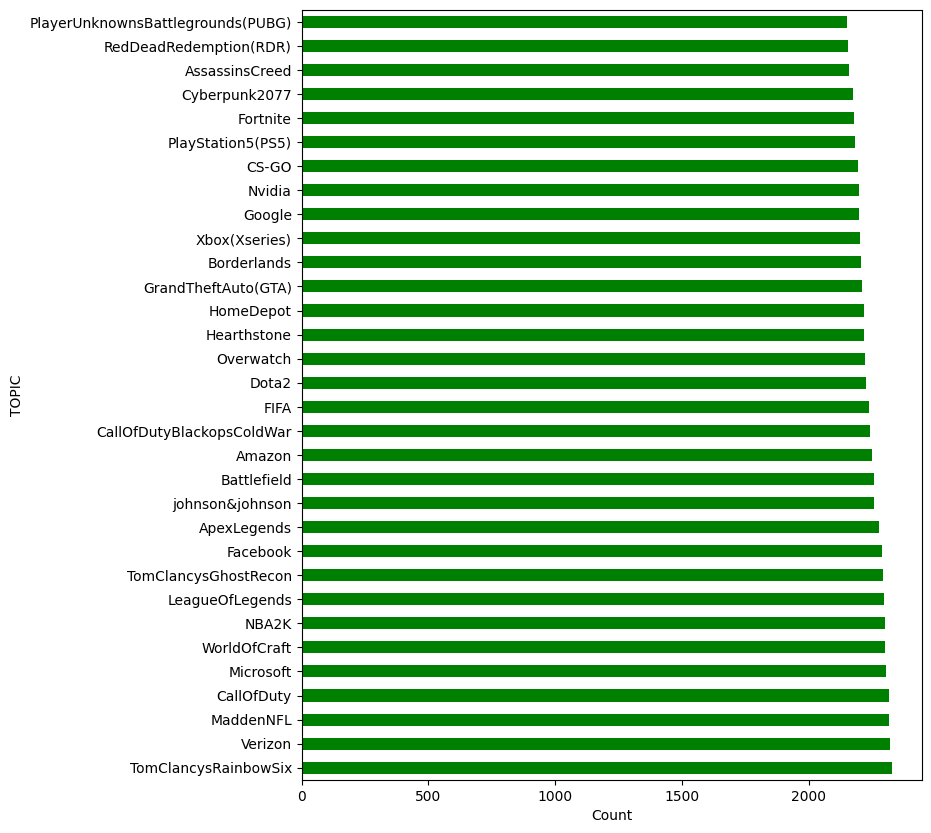

In [36]:
plt.figure(figsize=(8,10))
train['TOPIC'].value_counts().plot(kind='barh',color='g')
plt.xlabel("Count")
plt.show()

C:\Users\vasan\AppData\Local\Temp\ipykernel_2768\371393692.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'SENTIMENT',data=train,palette='viridis')


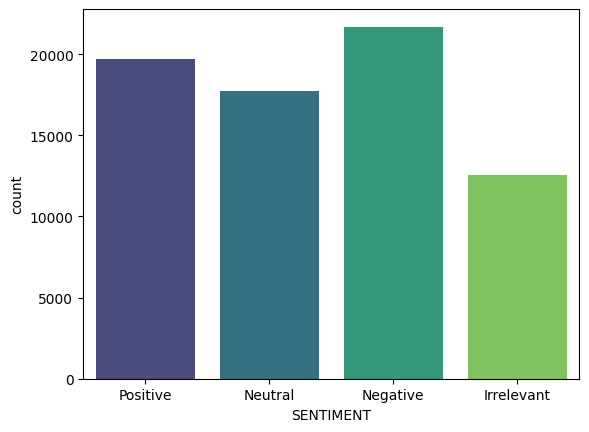

In [38]:
sns.countplot(x = 'SENTIMENT',data=train,palette='viridis')
plt.show()

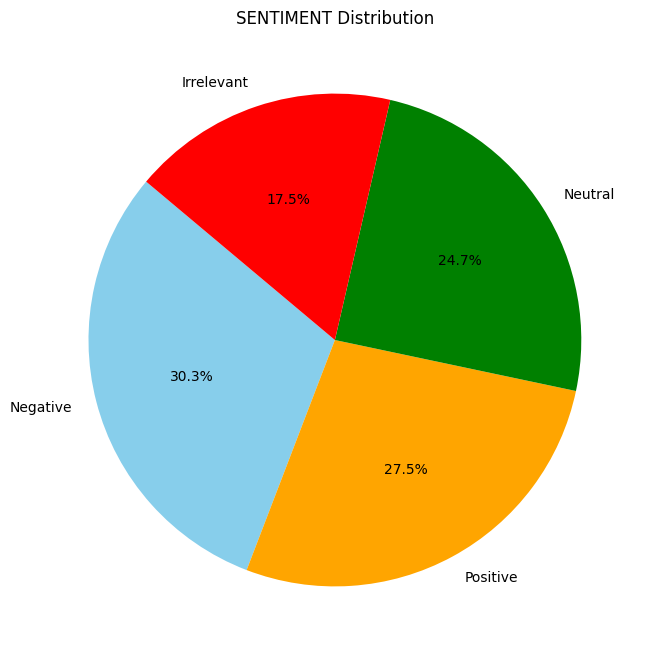

In [40]:
# Calculate the counts for each sentiment
SENTIMENT_counts = train['SENTIMENT'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(SENTIMENT_counts, labels=SENTIMENT_counts.index, autopct="%1.1f%%", startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])

plt.title('SENTIMENT Distribution')

# Show the plot
plt.show()

Observation:

Most topic has negative sentiment

In [43]:
train


,ID,TOPIC,SENTIMENT,TEXT
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


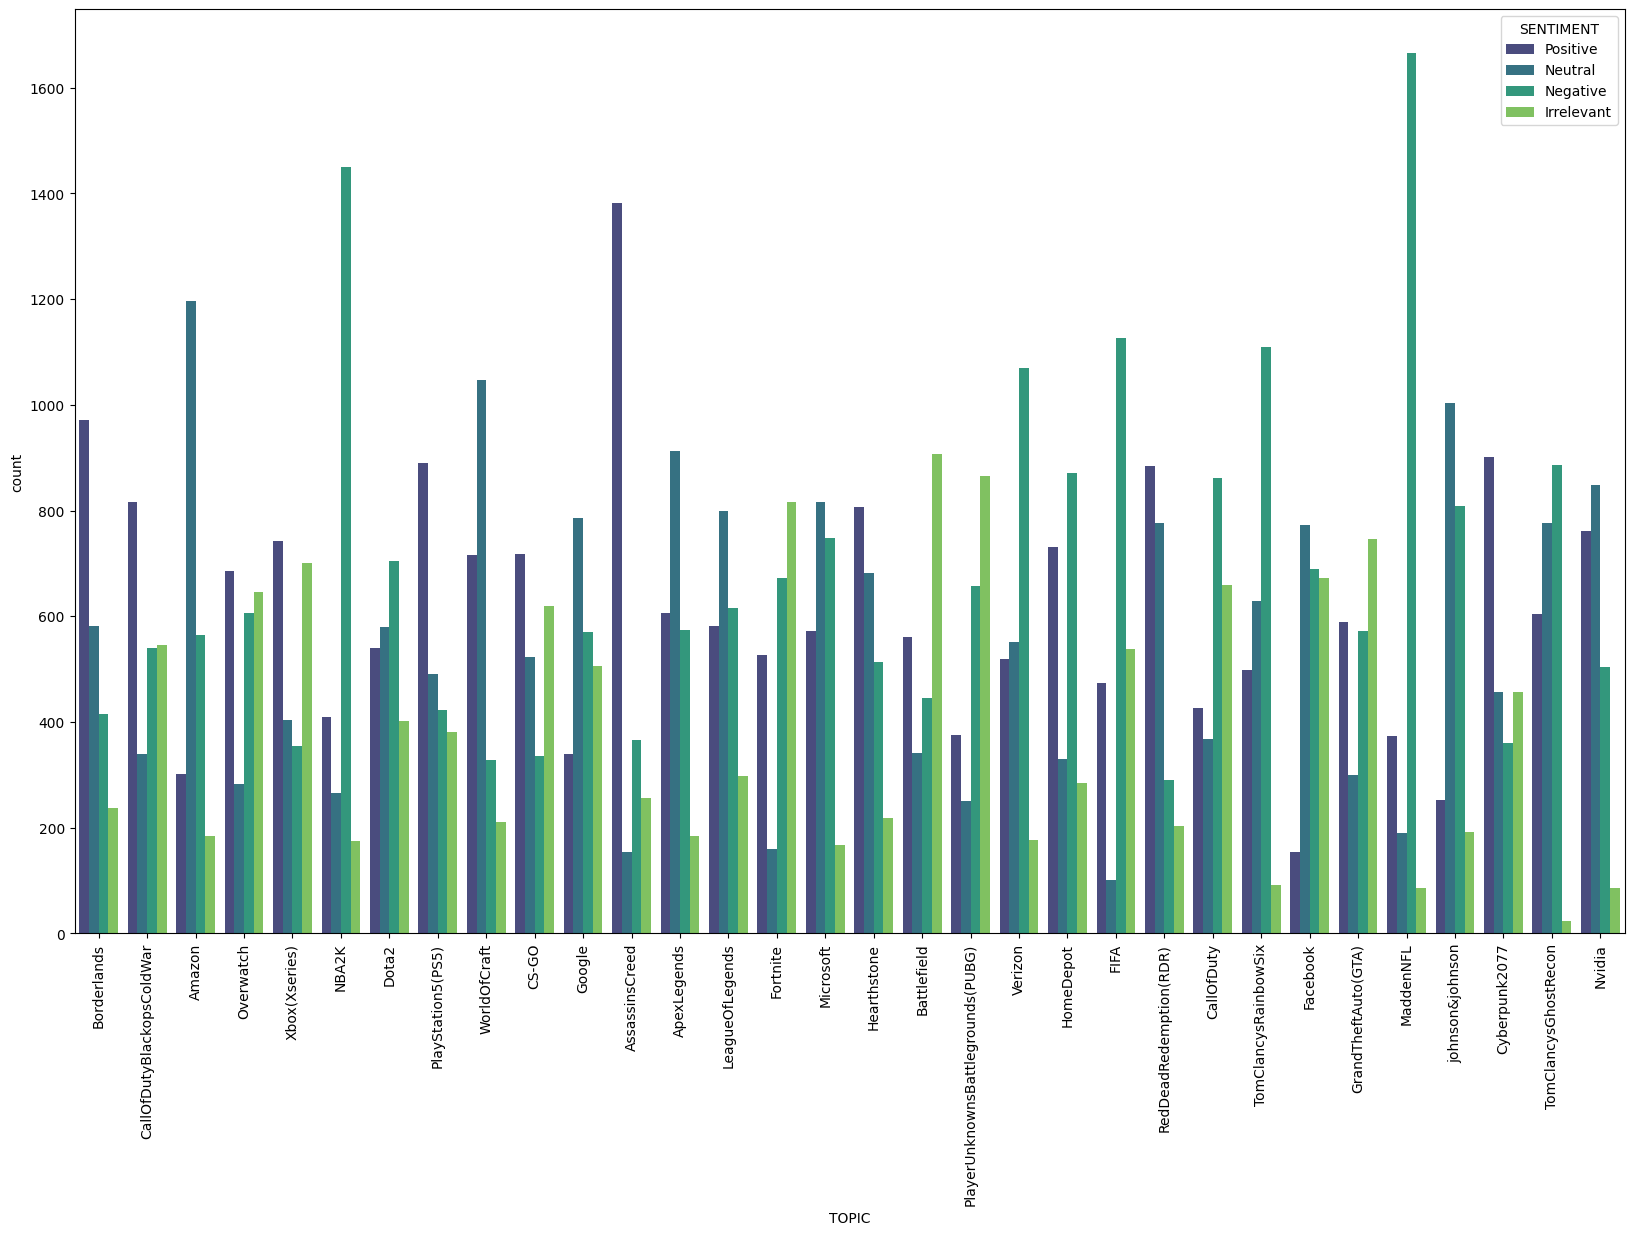

In [47]:
plt.figure(figsize=(20,12))
sns.countplot(x='TOPIC',data=train,palette='viridis',hue='SENTIMENT')
plt.xticks(rotation=90)
plt.show()

In [51]:
print(train.columns)

Index(['ID', 'TOPIC', 'SENTIMENT', 'TEXT'], dtype='object')


In [79]:
import pandas as pd

In [81]:
train=pd.read_csv('D:/PRODIGY/train.csv')

C:\Users\vasan\AppData\Local\Temp\ipykernel_2768\1801514070.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment, x='TOPIC', y='Count', palette='viridis')


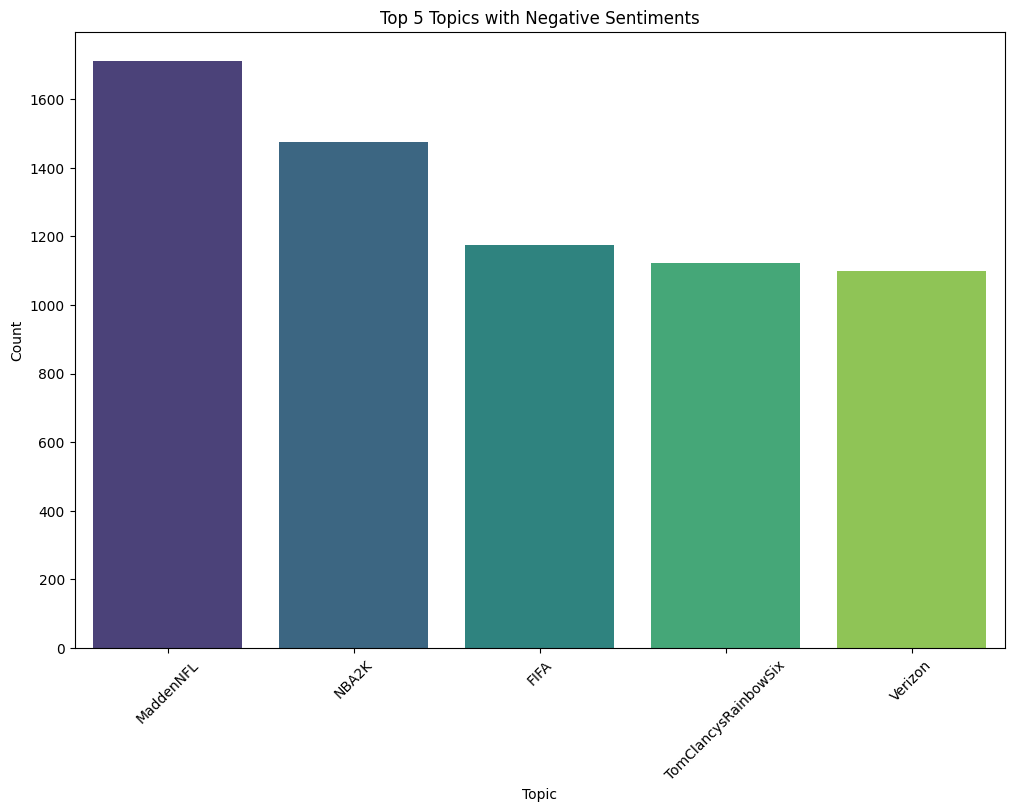

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train = pd.read_csv('D:/PRODIGY/train.csv')

# Filter for negative sentiment topics, count occurrences, and select the top 5
top_topics_sentiment = (
    train[train['SENTIMENT'] == 'Negative']
    .groupby('TOPIC')
    .size()
    .reset_index(name='Count')
    .nlargest(5, 'Count')
)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment, x='TOPIC', y='Count', palette='viridis')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [89]:
print(train.columns)

Index(['ID', 'TOPIC', 'SENTIMENT', 'TEXT'], dtype='object')


C:\Users\vasan\AppData\Local\Temp\ipykernel_2768\1163228167.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment_positive, x='TOPIC', y='Count', palette='Greens')


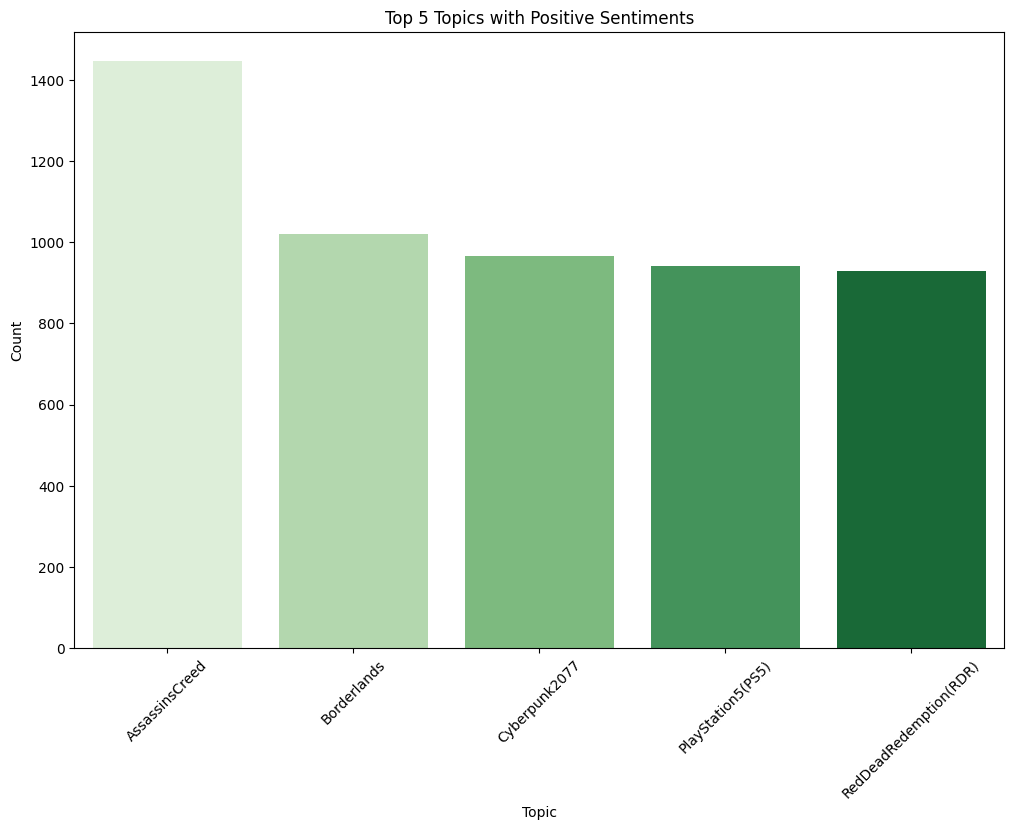

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train = pd.read_csv('D:/PRODIGY/train.csv')

# Filter for positive sentiment topics, count occurrences, and select the top 5
top_topics_sentiment_positive = (
    train[train['SENTIMENT'] == 'Positive']
    .groupby('TOPIC')
    .size()
    .reset_index(name='Count')
    .nlargest(5, 'Count')
)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment_positive, x='TOPIC', y='Count', palette='Greens')
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\vasan\AppData\Local\Temp\ipykernel_2768\2835588594.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment_neutral, x='TOPIC', y='Count', palette='Blues')


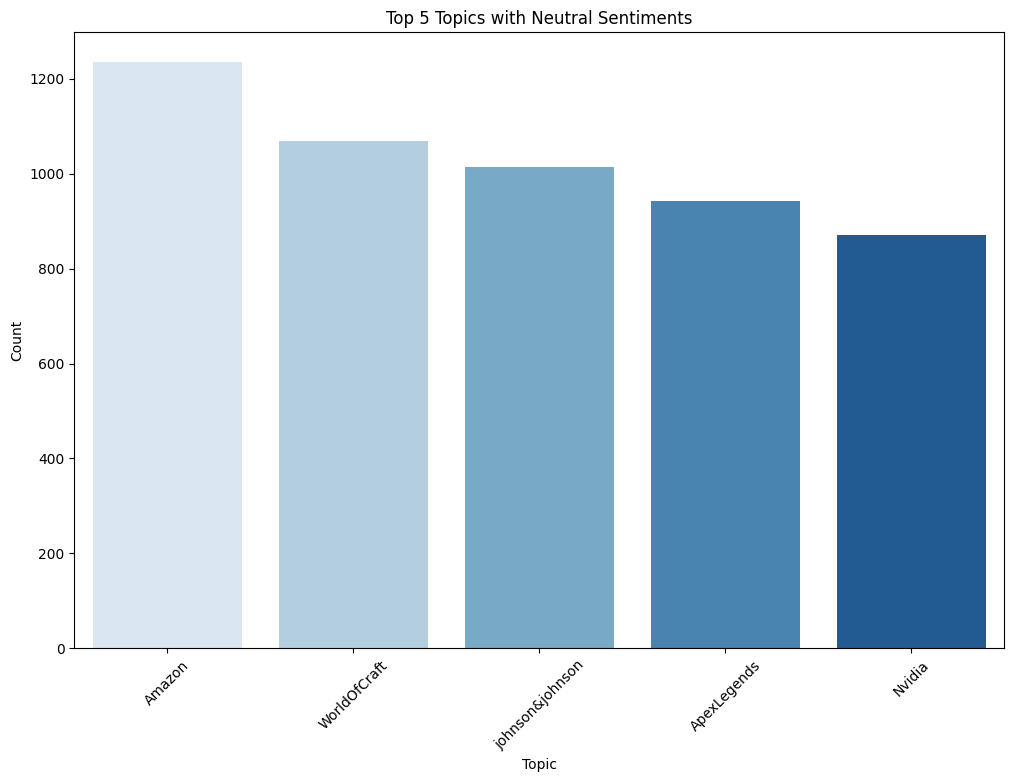

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train = pd.read_csv('D:/PRODIGY/train.csv')

# Filter for neutral sentiment topics, count occurrences, and select the top 5
top_topics_sentiment_neutral = (
    train[train['SENTIMENT'] == 'Neutral']
    .groupby('TOPIC')
    .size()
    .reset_index(name='Count')
    .nlargest(5, 'Count')
)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment_neutral, x='TOPIC', y='Count', palette='Blues')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\vasan\AppData\Local\Temp\ipykernel_2768\2267195197.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment_neutral, x='TOPIC', y='Count', palette='coolwarm')


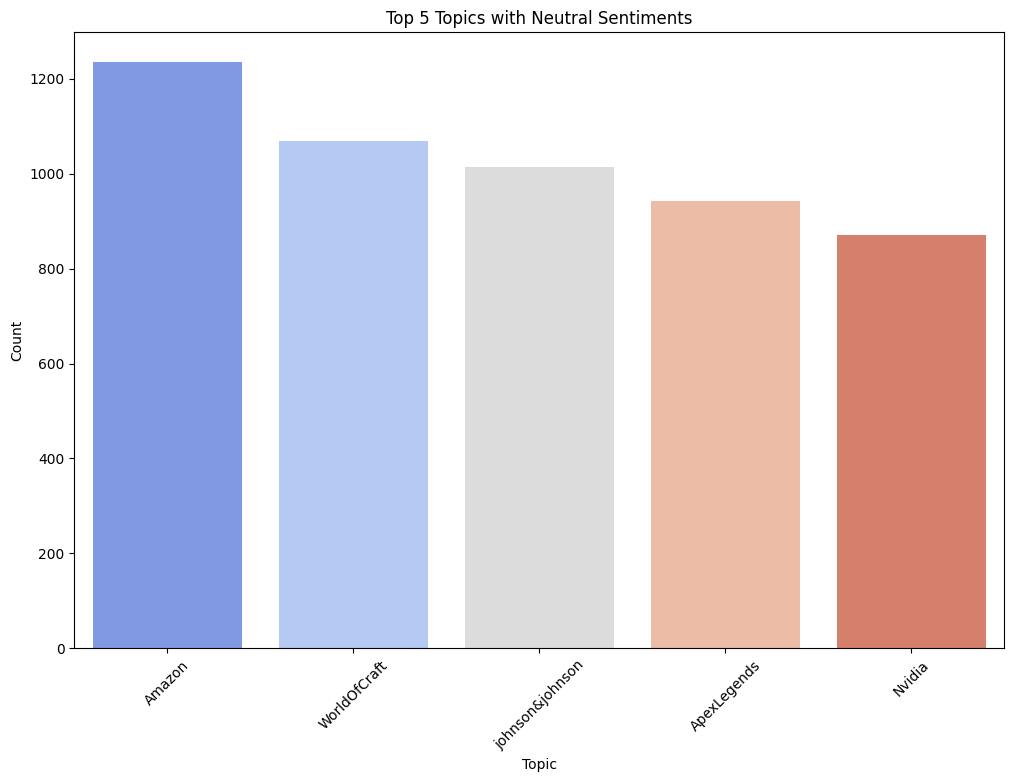

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train = pd.read_csv('D:/PRODIGY/train.csv')

# Filter for neutral sentiment topics, count occurrences, and select the top 5
top_topics_sentiment_neutral = (
    train[train['SENTIMENT'] == 'Neutral']  # Filter for neutral sentiment
    .groupby('TOPIC')  # Group by topic
    .size()  # Count occurrences
    .reset_index(name='Count')  # Reset index and rename the count column
    .nlargest(5, 'Count')  # Get top 5 topics by count
)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment_neutral, x='TOPIC', y='Count', palette='coolwarm')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

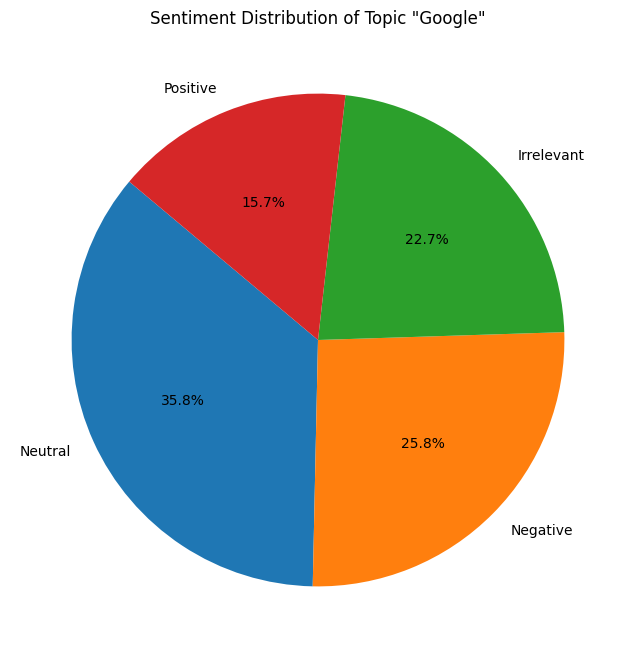

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
train = pd.read_csv('D:/PRODIGY/train.csv')

# Filter the dataset to include only entries related to the topic 'Google'
google_data = train[train['TOPIC'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['SENTIMENT'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

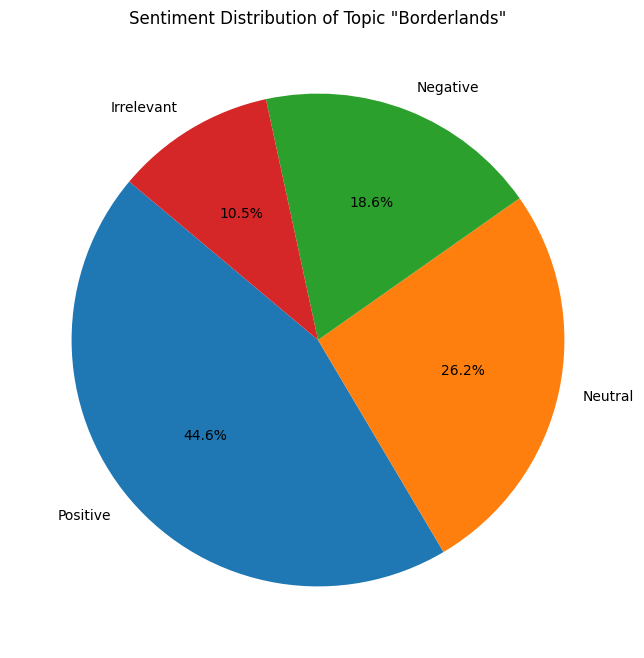

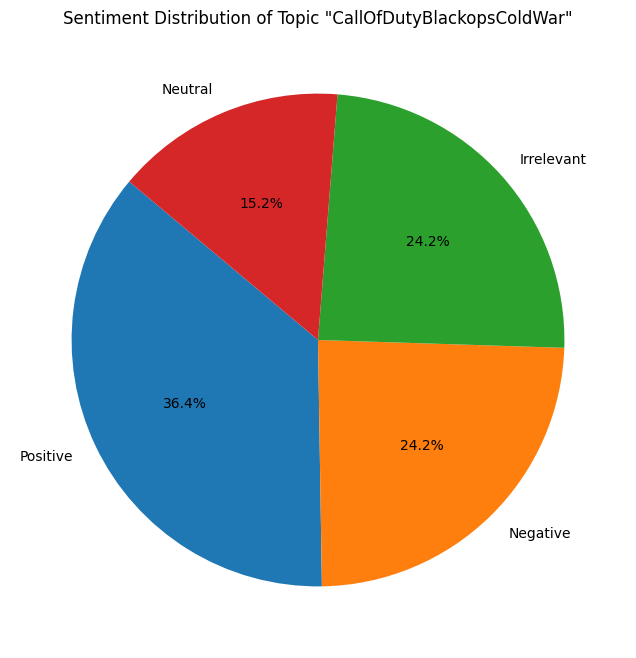

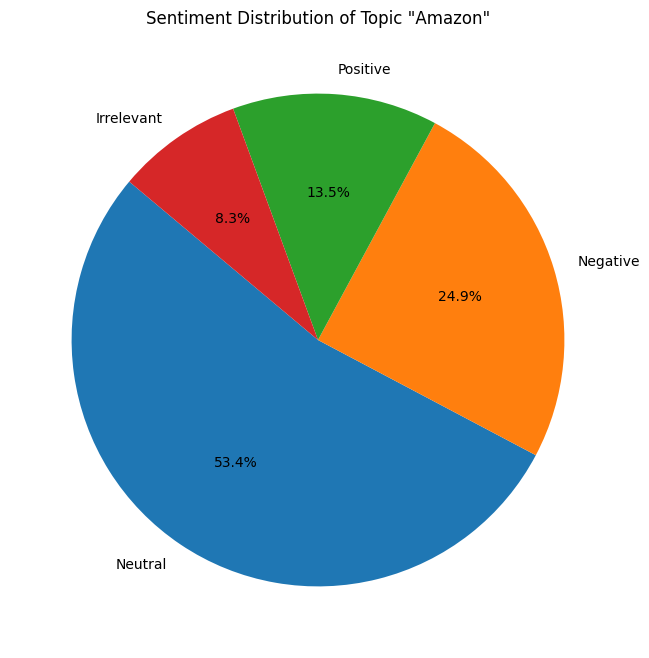

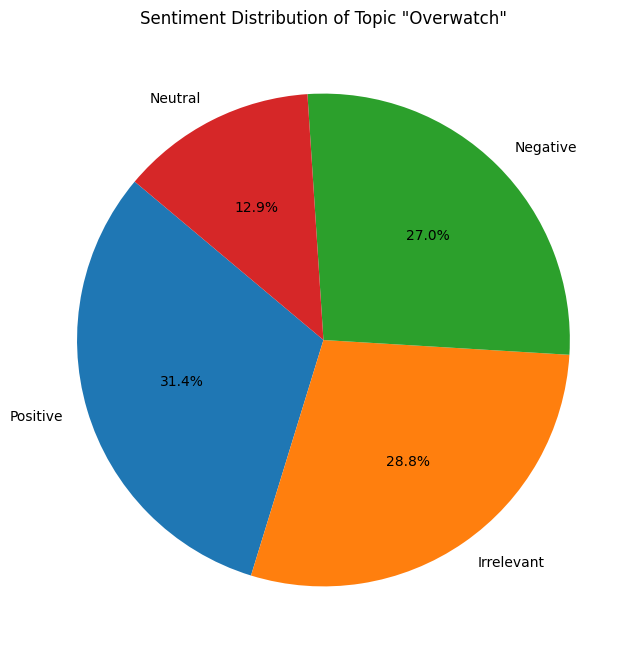

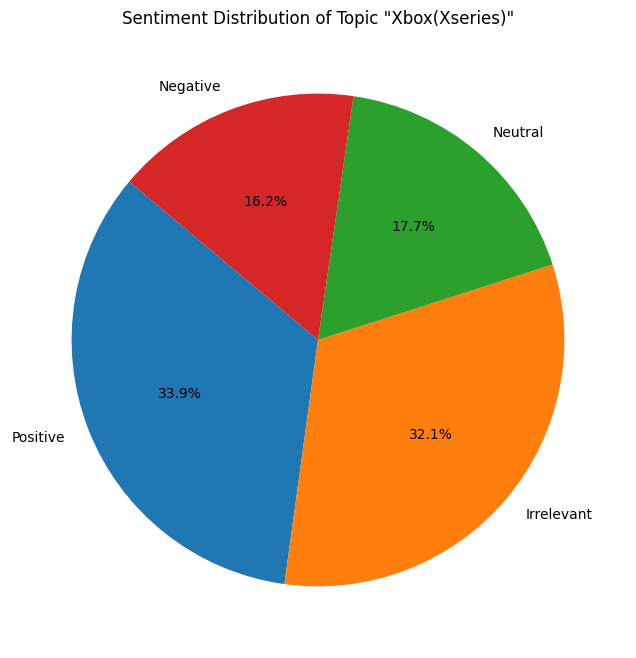

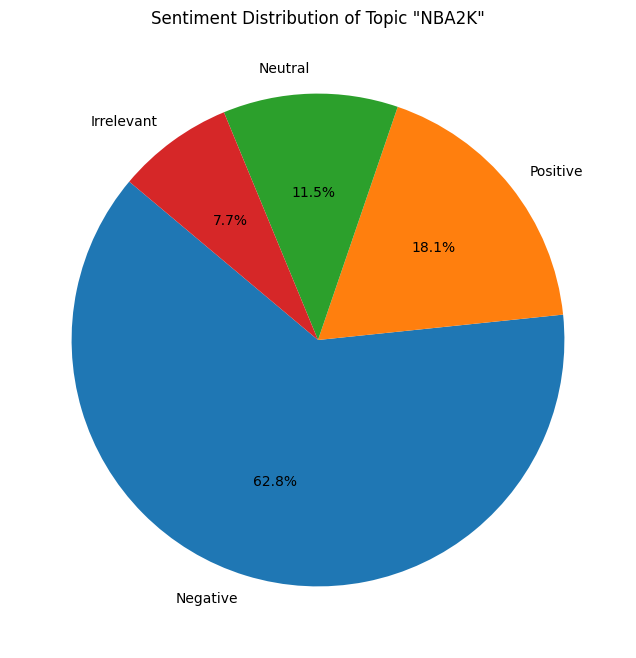

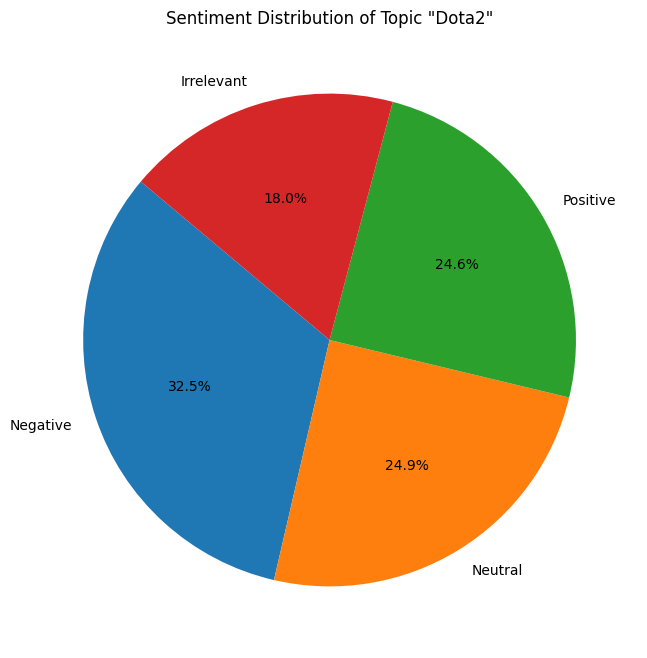

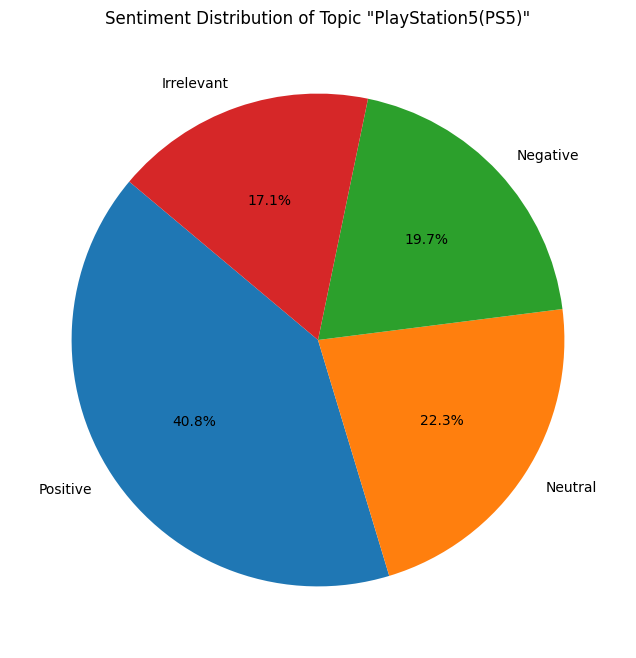

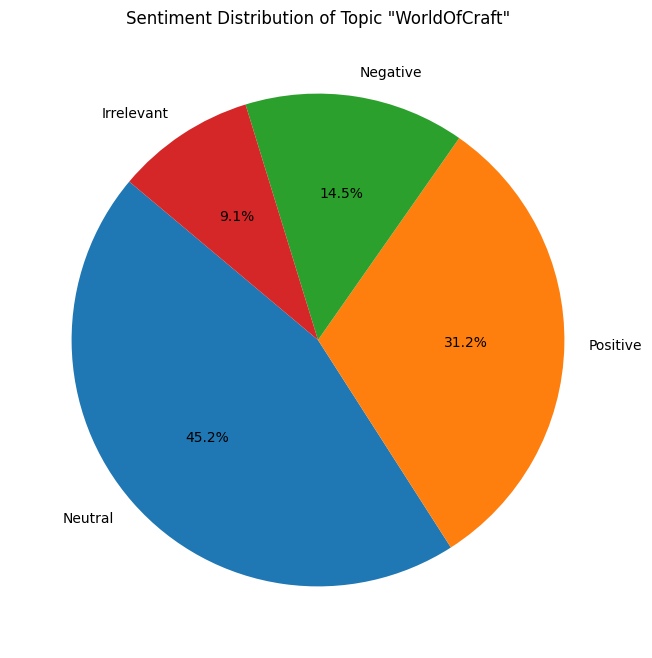

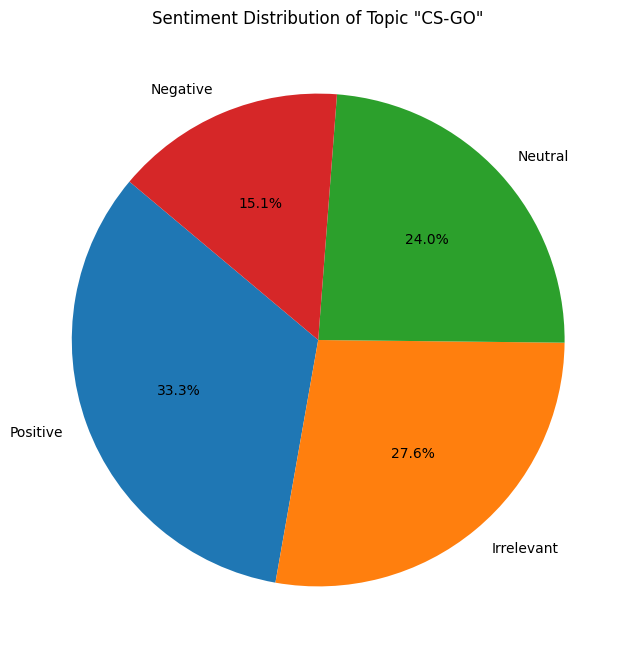

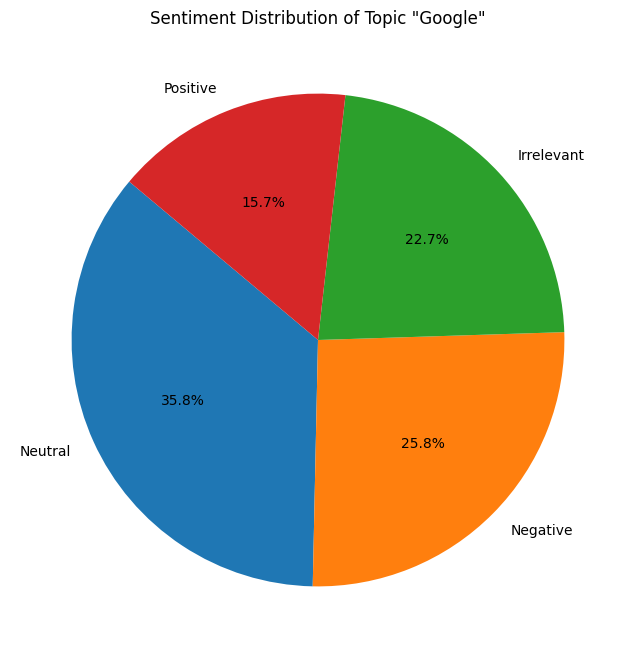

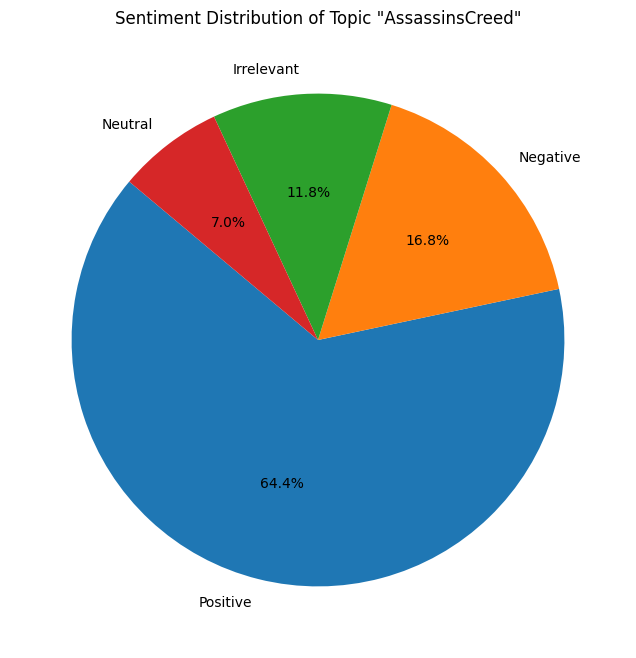

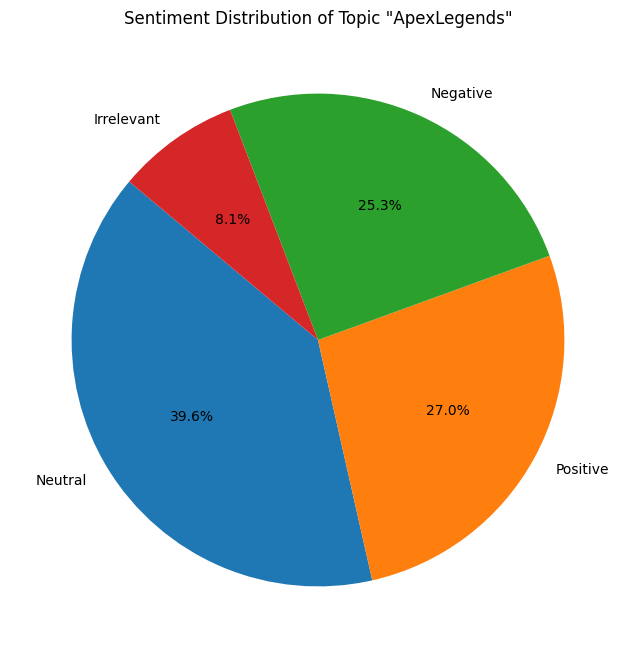

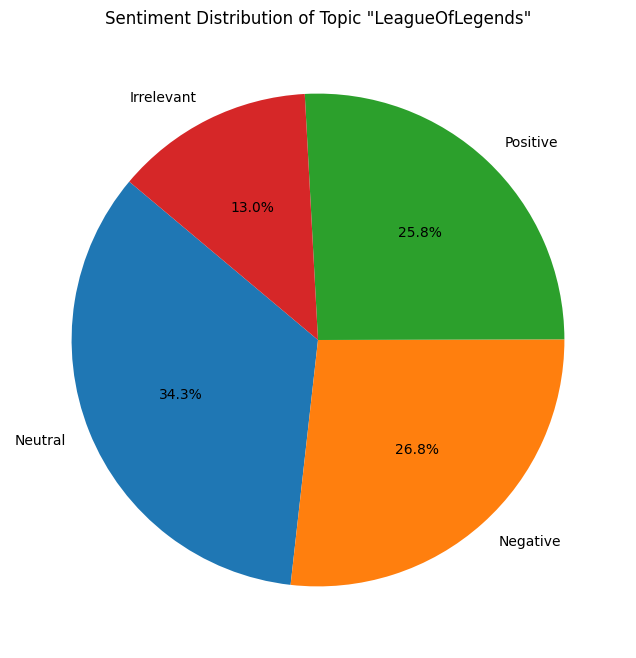

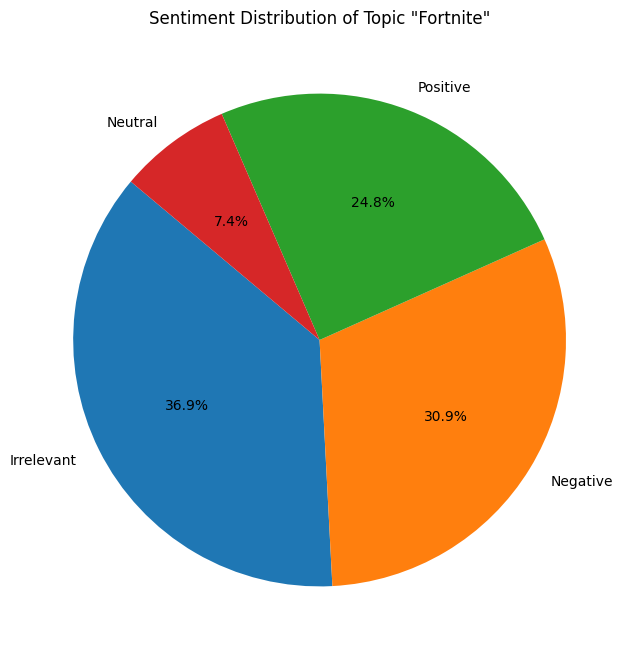

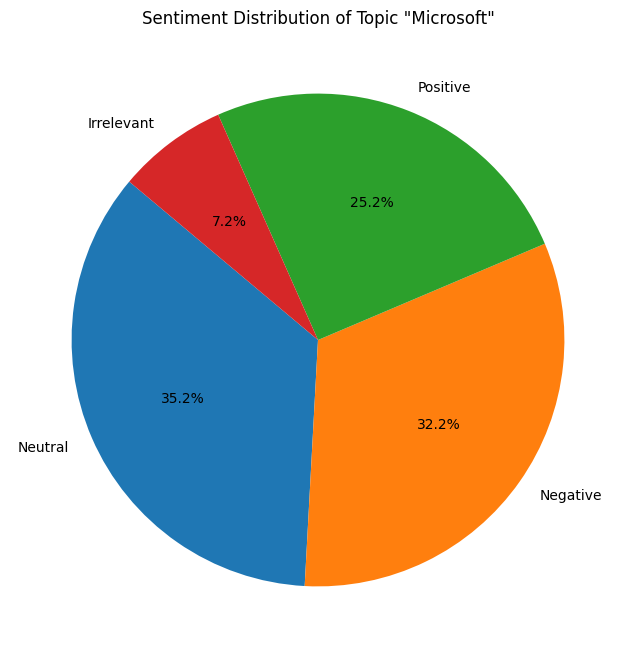

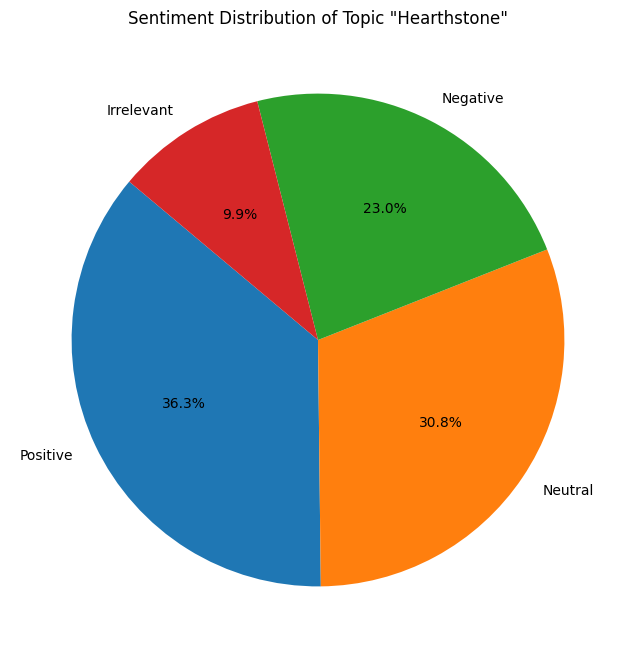

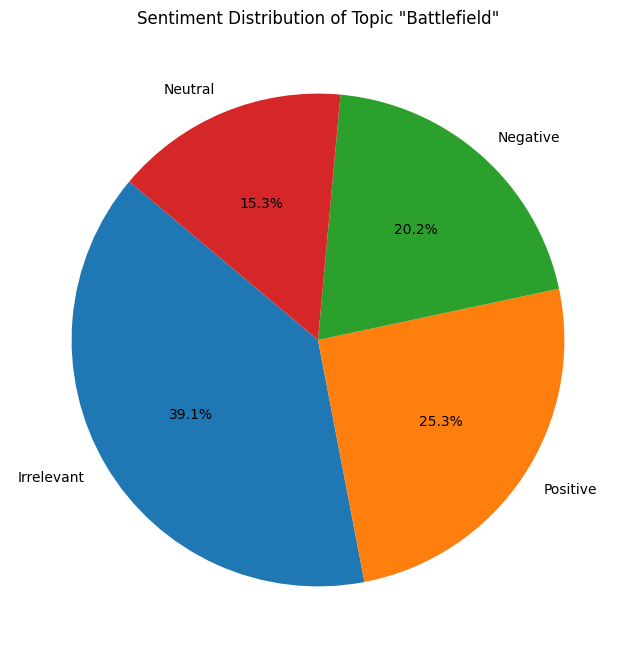

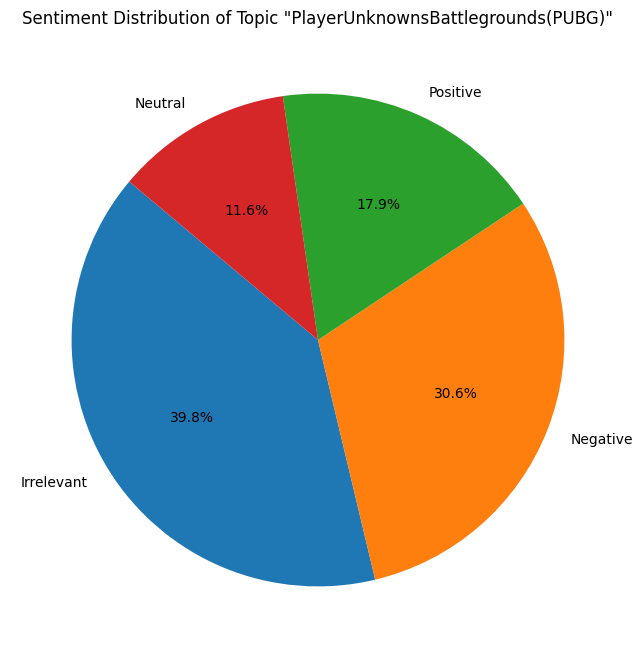

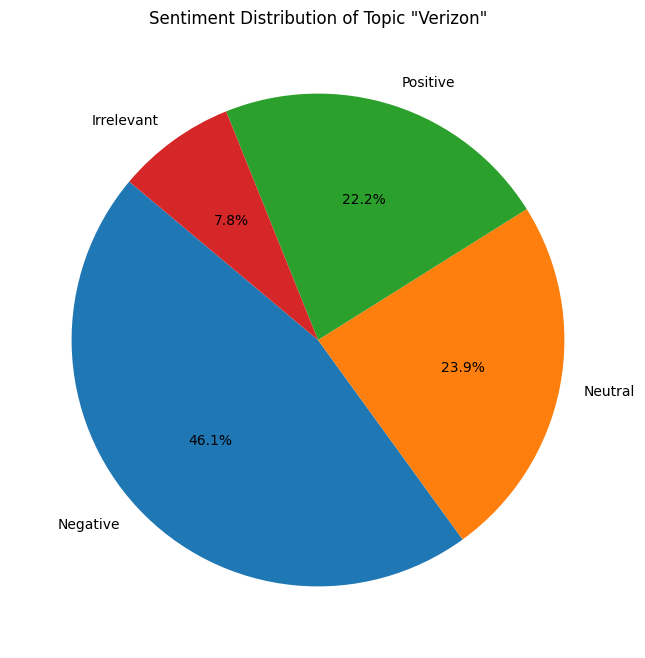

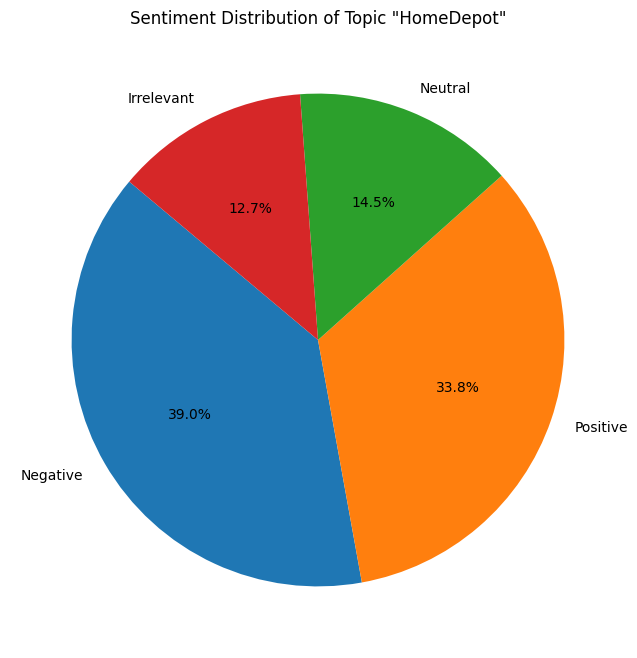

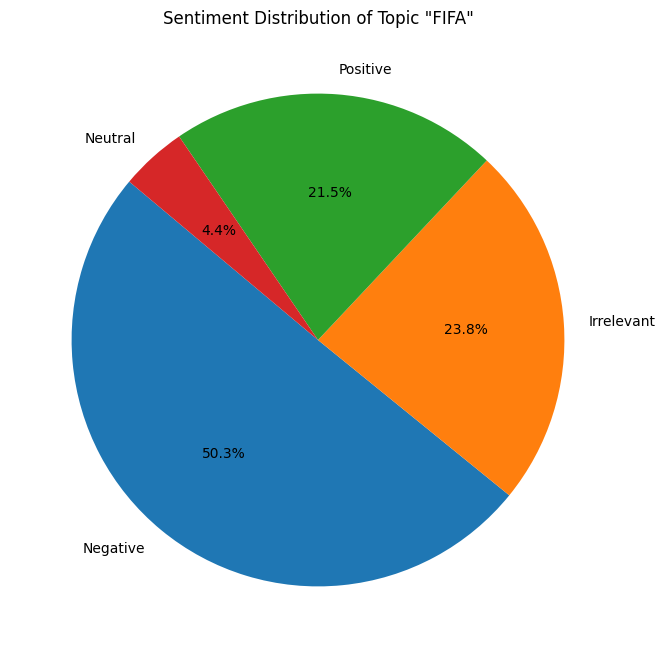

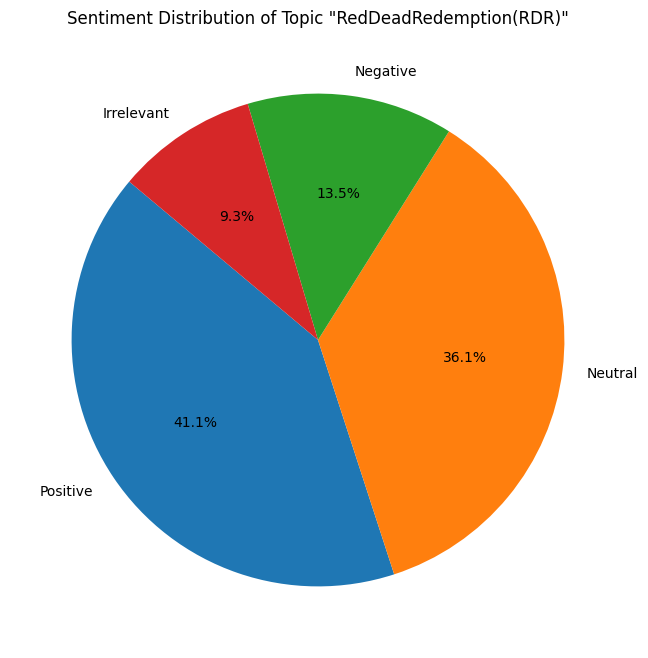

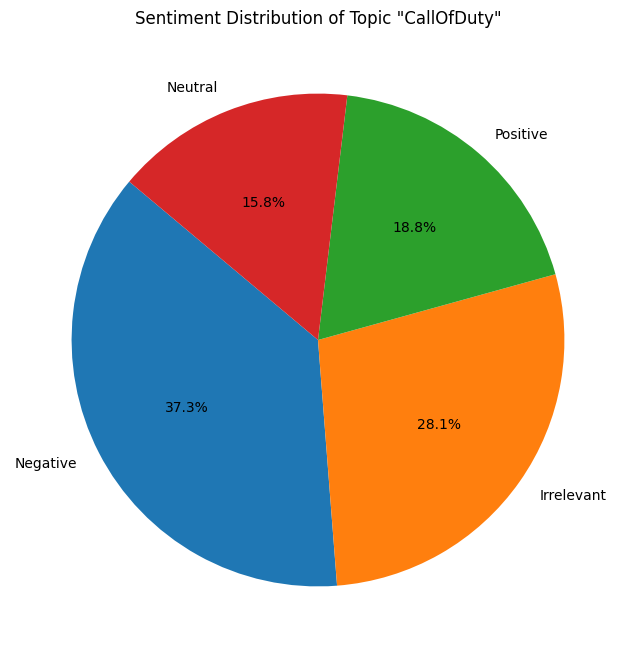

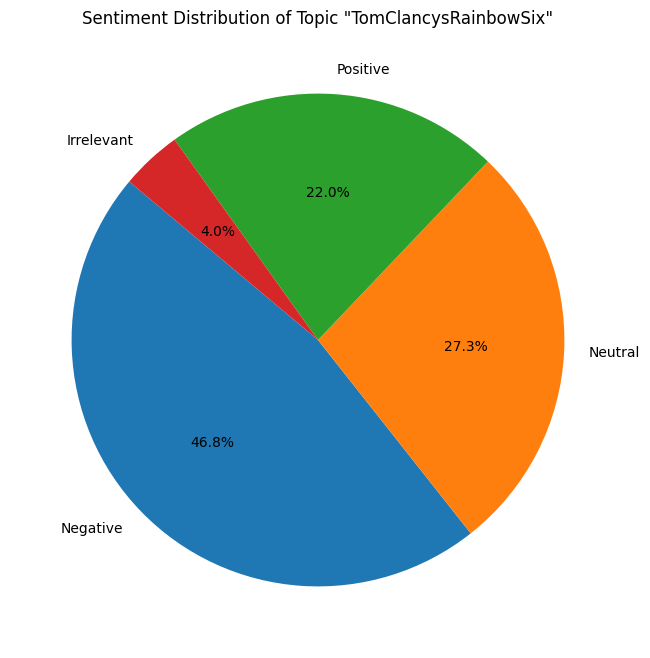

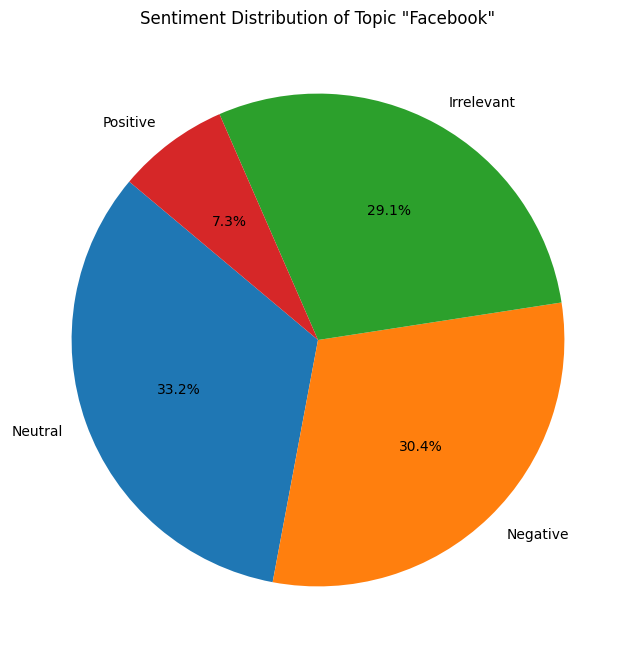

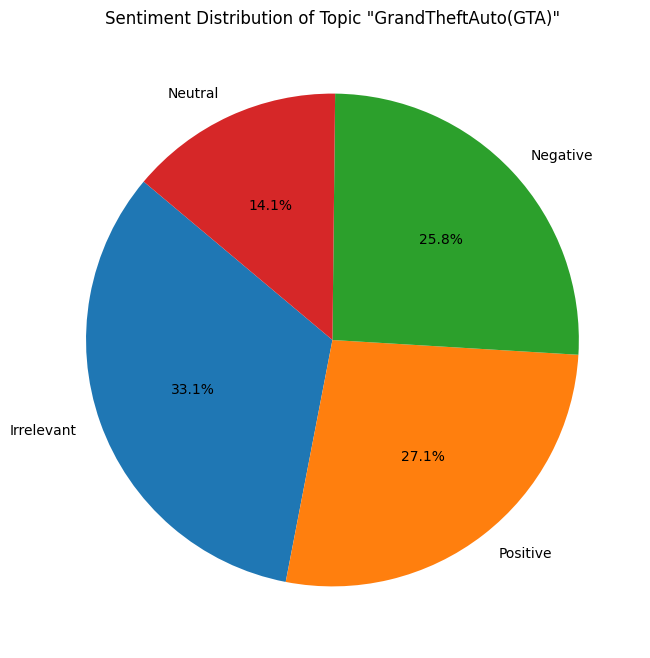

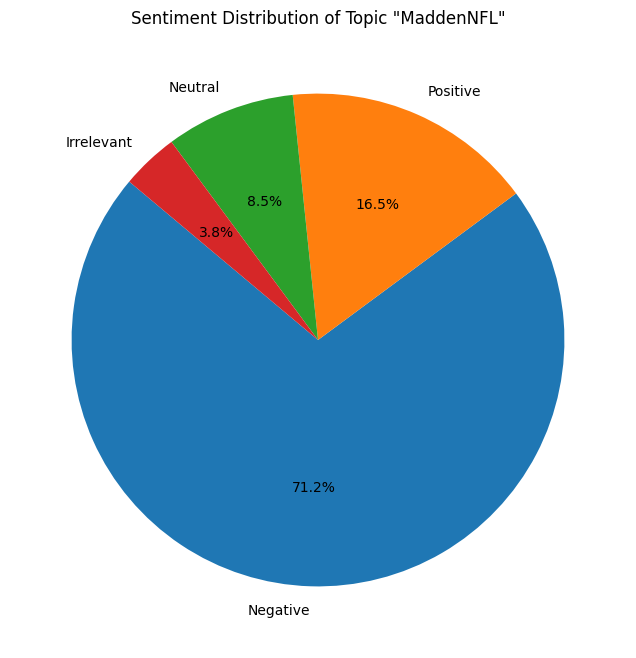

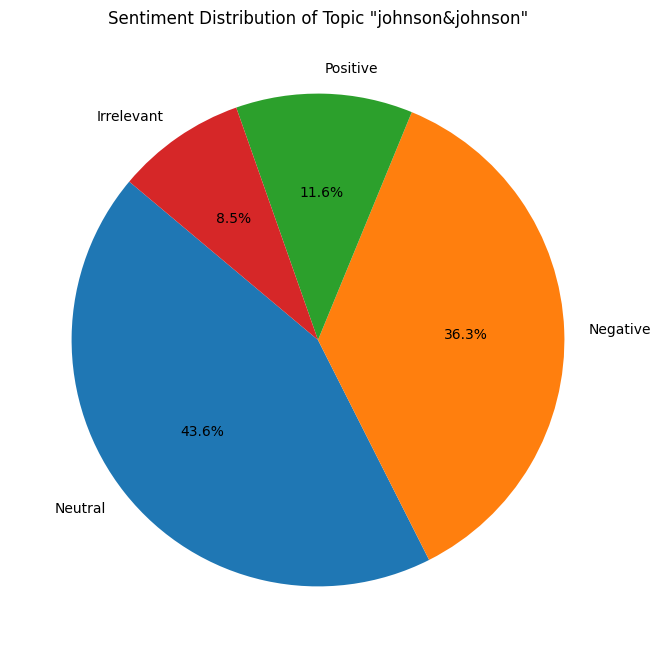

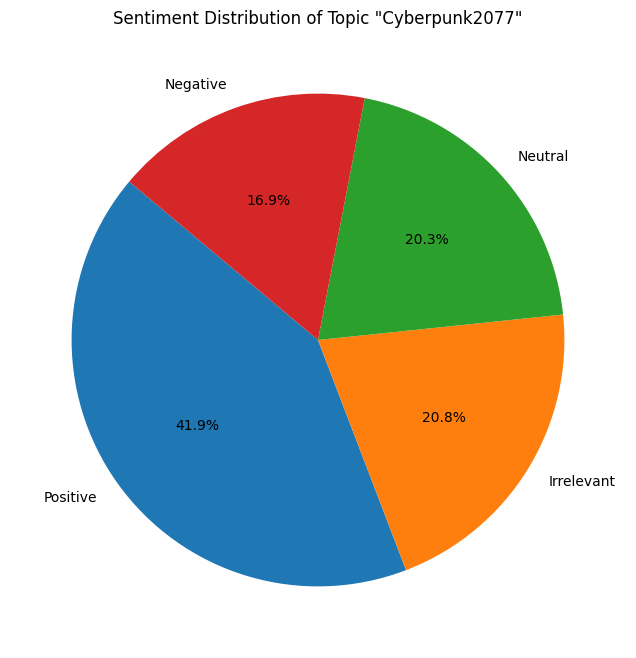

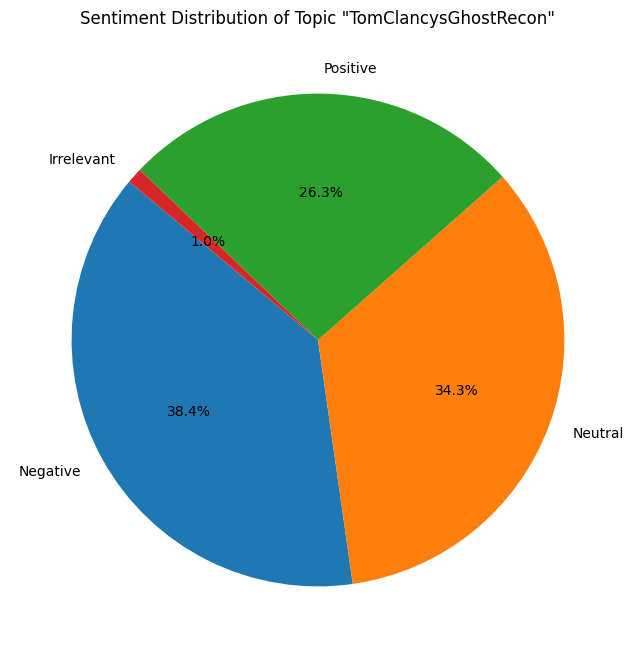

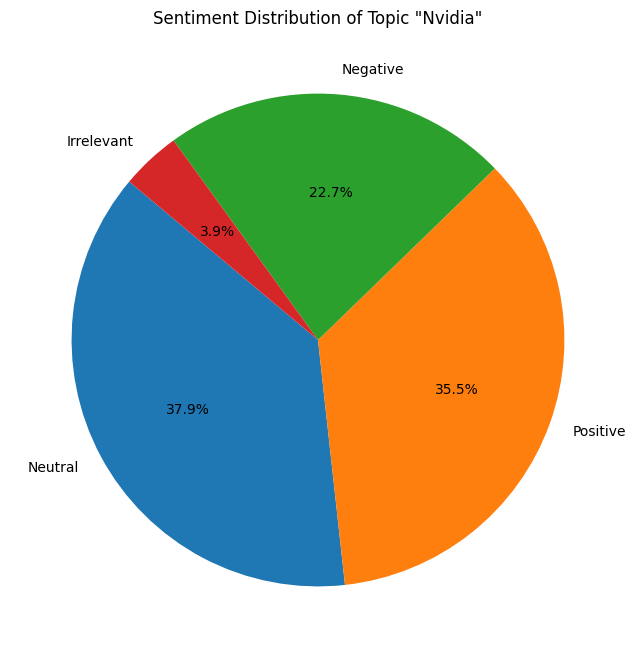

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
train = pd.read_csv('D:/PRODIGY/train.csv')

# Get a list of unique topics
topics = train['TOPIC'].unique()

# Plot a pie chart for each topic's sentiment distribution
for topic in topics:
    # Filter the dataset to include only entries related to the current topic
    topic_data = train[train['TOPIC'] == topic]
    
    # Count the occurrences of each sentiment within the filtered dataset
    sentiment_counts = topic_data['SENTIMENT'].value_counts()
    
    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Sentiment Distribution of Topic "{topic}"')
    plt.show()

In [113]:
print(train.columns)

Index(['ID', 'TOPIC', 'SENTIMENT', 'TEXT'], dtype='object')


In [123]:
train['TEXT'] = train['TEXT'].fillna('')  # Replace NaN with empty string


In [125]:
train = train.dropna(subset=['TEXT'])


In [131]:
train['msg_len'] = train['TEXT'].apply(len)


In [133]:
train

,ID,TOPIC,SENTIMENT,TEXT,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159


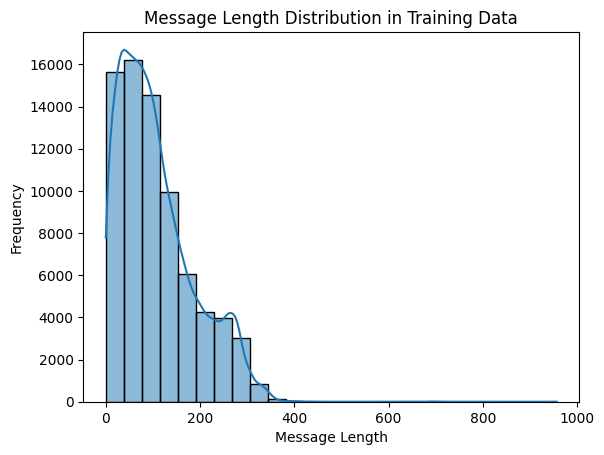

In [135]:
sns.histplot(train['msg_len'], bins=25,kde=True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

C:\Users\vasan\AppData\Local\Temp\ipykernel_2768\1847771623.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x=train['SENTIMENT'], y='msg_len', palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])


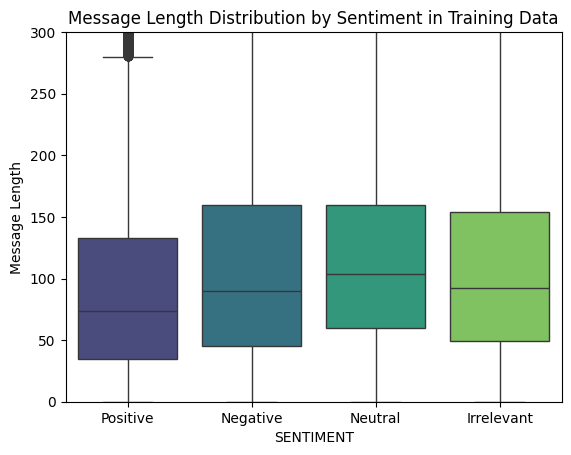

In [139]:
sns.boxplot(data=train, x=train['SENTIMENT'], y='msg_len', palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message Length Distribution by Sentiment in Training Data')
plt.ylabel('Message Length')
plt.xlabel('SENTIMENT')
plt.ylim(0,300)
plt.show()  

In [141]:
pip install pandas seaborn matplotlib


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


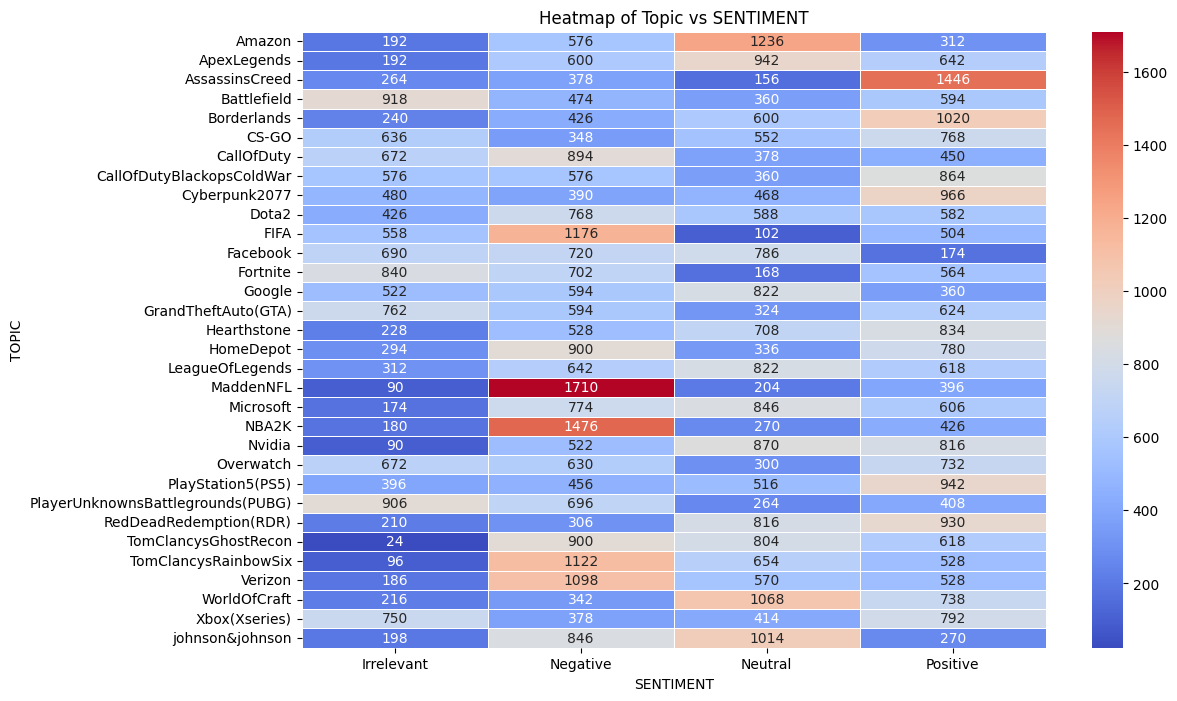

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train = pd.read_csv('D:/PRODIGY/train.csv')

# Ensure 'Topic' and 'Sentiment' columns are strings
train['TOPIC'] = train['TOPIC'].astype(str)
train['SENTIMENT'] = train['SENTIMENT'].astype(str)

# Drop rows with missing values in 'Topic' or 'Sentiment'
train = train.dropna(subset=['TOPIC', 'SENTIMENT'])

# Create the crosstab
crosstab = pd.crosstab(index=train['TOPIC'], columns=train['SENTIMENT'])

# Plot the heatmap
plt.figure(figsize=(12, 8))  
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Add labels and title
plt.title('Heatmap of Topic vs SENTIMENT')
plt.xlabel('SENTIMENT')
plt.ylabel('TOPIC')

# Show the plot
plt.show()

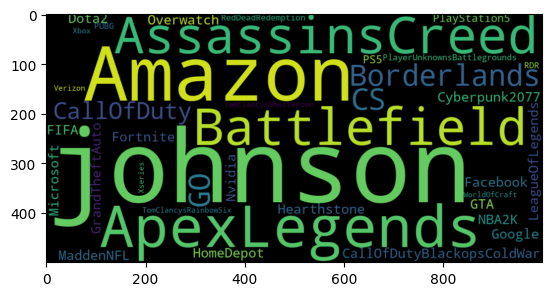

In [149]:
topic_list = ' '.join(crosstab.index)


wc = WordCloud(width=1000, height=500).generate(topic_list)

plt.imshow(wc, interpolation='bilinear')

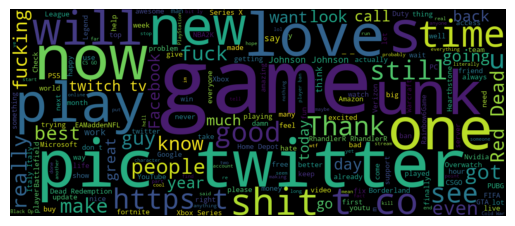

In [157]:
# Handle missing values by filling NaN with an empty string or dropping rows
train['TEXT'] = train['TEXT'].fillna('')  # Replace NaN with empty string

# Ensure all entries in 'TEXT' are strings
train['TEXT'] = train['TEXT'].astype(str)

# Now join all the text into a single corpus
corpus = ' '.join(train['TEXT'])

# Generate the WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc2 = WordCloud(width=1200, height=500).generate(corpus)

# Display the word cloud
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()